In [27]:
# pip install tensorflow

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import mne

In [19]:
folder = r'D:\CHB_MIT'
# folder = r'E:\New folder\chb24'
file_path = [os.path.join(folder,i ) for i in os.listdir(folder)]

In [20]:
print(file_path)

['D:\\CHB_MIT\\chb24']


In [21]:
os.listdir(file_path[0])

['ictal', 'interictal', 'postictal', 'preictal']

In [22]:
%%capture
import os
import mne

# folder = r'E:\New folder\chb24'
subfolders = [os.path.join(folder, name) for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

# Dictionary to store loaded data
data_dict = {}

for subfolder in subfolders:
    for state_folder in os.listdir(subfolder):
        full_state_path = os.path.join(subfolder, state_folder)
        fif_files = [f for f in os.listdir(full_state_path) if f.endswith('.fif')]
        for fif_file in fif_files:
            file_path = os.path.join(full_state_path, fif_file)
            raw = mne.io.read_raw_fif(file_path, preload=True)
            print(raw.info)
            data_dict[(subfolder, state_folder, fif_file)] = raw
            


# raw data process 24

In [6]:
import numpy as np
import mne

def process_eeg_data(data_dict, target_sfreq=128, epoch_duration=5.0, ictal_overlap = 0.99, preictal_overlap = .5, post_ictal = .80):
    """
    Processes EEG data by downsampling, creating epochs with overlap, 
    and converting data to reduced precision format.
    
    Parameters:
    - data_dict: Dictionary with (subject, state, file_name) as keys and raw EEG data as values.
    - target_sfreq: Target sampling frequency for downsampling.
    - epoch_duration: Duration of each epoch in seconds.
    
    Returns:
    - X: Combined NumPy array of EEG epochs.
    - Y: Corresponding labels for the epochs.
    """
    
    X = []
    Y = []
    
    for (subject, state, file_name), raw in data_dict.items():
        raw.resample(target_sfreq)  # Downsample the data
        
        if raw.times[-1] < epoch_duration:
            print(f"Warning: Data length is shorter than the epoch duration for {file_name}.")
            continue

        # Determine overlap and label based on state
        if state == 'ictal':
            overlap_fraction = ictal_overlap # 95% overlap
            label = 1
        elif state == 'preictal':
            overlap_fraction = preictal_overlap # 50% overlap
            label = 2
        elif state == 'postictal':  # interictal, postictal
            overlap_fraction = post_ictal  # 90% overlap
            label = 3
        else:
            overlap_fraction = 0.0  # No overlap
            label = 0

        overlap = epoch_duration * overlap_fraction
        
        # Create fixed-length epochs with the calculated overlap
        epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration, preload=True, overlap=overlap)
        
        # Get data and labels, using reduced precision
        X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
        Y_epochs = np.full(X_epochs.shape[0], label)  # Assign the label to each epoch
        print(f"Label {label} generated {len(Y_epochs)} epochs.")
        
        X.append(X_epochs)
        Y.append(Y_epochs)

    # Combine all data and labels into single arrays using vstack and hstack
    X = np.vstack(X)
    Y = np.hstack(Y)

    print("Final shapes:", X.shape, Y.shape)
    
    return X, Y

# Example usage
# X, Y = process_eeg_data(data_dict)


In [7]:
X, Y = process_eeg_data(data_dict,target_sfreq=128, epoch_duration=5.0)

Not setting metadata
401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 401 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 401 epochs.
Not setting metadata
401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 401 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 401 epochs.
Not setting metadata
481 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 481 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 481 epochs.
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 401 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 401 epochs.
Not setting metadata
541 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 541 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 541 epochs.
Not setting metadata
441 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 441 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 441 epochs.
Not setting metadata
281 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 281 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Label 1 generated 281 epochs.
Not setting metadata
381 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 381 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 381 epochs.
Not setting metadata
341 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 341 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 341 epochs.
Not setting metadata
281 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 281 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 281 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change t

Not setting metadata
1301 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1301 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 1301 epochs.
Not setting metadata
221 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 221 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 221 epochs.
Not setting metadata
441 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 441 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Label 1 generated 441 epochs.
Not setting metadata
241 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 241 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 241 epochs.
Not setting metadata
1221 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1221 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 1221 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
1261 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1261 events and 640 original time points ...
0 bad epochs dropped
Label 1 generated 1261 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 720 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
213 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 213 events and 640 original time points ...
0 bad epochs dropped
Label 0 generated 213 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


292 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 292 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 292 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 27 epochs.
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 15 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Label 3 generated 596 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 191 epochs.
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 91 epochs.
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


88 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 88 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 88 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
434 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 434 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 434 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 490 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 490 epochs.
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 14 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True
C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
697 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 697 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 697 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped
Label 2 generated 719 epochs.


C:\Users\ACER\AppData\Local\Temp\ipykernel_3680\252492953.py:49: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)  # Explicitly set copy=True


Final shapes: (27942, 21, 640) (27942,)


In [8]:
pd.DataFrame(Y).value_counts()
# # Y

0
1    8636
0    6693
2    6319
3    6294
Name: count, dtype: int64

In [9]:
X.shape

(27942, 21, 640)

In [10]:
X = np.moveaxis(X,1,2)
X.shape

(27942, 640, 21)

In [77]:
np.savez(r'D:\processed data for CHB\chb24\raw\5sraw.npz',X=X, Y=Y)

# DWT data process different time segments


In [23]:
import numpy as np
import mne
import pywt
from scipy.signal import welch

def preprocess_eeg_data(data_dict, target_sfreq=128, epoch_duration=5.0,
                        ictal_overlap=0.985, preictal_overlap=0.5, post_ictal=0.80):
    """
    Preprocesses EEG data by downsampling and creating epochs with overlap.

    Parameters:
    - data_dict: Dictionary with (subject, state, file_name) as keys and raw EEG data as values.
    - target_sfreq: Target sampling frequency for downsampling.
    - epoch_duration: Duration of each epoch in seconds.

    Returns:
    - preprocessed_epochs: List of tuples containing epochs and corresponding labels.
    """

    preprocessed_epochs = []
    
    for (subject, state, file_name), raw in data_dict.items():
        # Downsample the data
        raw.resample(target_sfreq)
        
        # Ensure that data is longer than the epoch duration
        if raw.times[-1] < epoch_duration:
            print(f"Warning: Data length is shorter than the epoch duration for {file_name}.")
            continue

        # Determine overlap and label based on state
        overlap_fraction = {
            'ictal': ictal_overlap,
            'preictal': preictal_overlap,
            'postictal': post_ictal
        }.get(state, 0.0)
        label = {'ictal': 1, 'preictal': 2, 'postictal': 3}.get(state, 0)

        # Calculate overlap in seconds
        overlap = epoch_duration * overlap_fraction
        
        # Create fixed-length epochs
        epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration, preload=True, overlap=overlap)
        
        # Get data from the epochs (shape: epochs x channels x samples)
        X_epochs = epochs.get_data().astype(np.float32, copy=True)
        
        # Store the epochs and their corresponding labels
        preprocessed_epochs.append((X_epochs, label))
    
    return preprocessed_epochs

import numpy as np

def fuzzy_entropy(signal, m=2, r=0.2):
    """
    Optimized fuzzy entropy calculation using vectorization.

    Parameters:
    - signal: 1D NumPy array of the time series signal.
    - m: Embedding dimension.
    - r: Similarity threshold.

    Returns:
    - Fuzzy entropy value.
    """
    N = len(signal)
    
    # Create delayed vectors (embedded vectors of length m and m+1)
    def _create_embedding(signal, m):
        return np.array([signal[i:N-m+1+i] for i in range(m)]).T

    # Embedding dimensions m and m+1
    Xm = _create_embedding(signal, m)  # Shape: (N-m+1, m)
    Xm1 = _create_embedding(signal, m+1)  # Shape: (N-m, m+1)
    
    # Compute pairwise Chebyshev distances for Xm and Xm1
    def _fuzzy_count(X, r):
        dist_matrix = np.max(np.abs(X[:, None] - X), axis=2)
        return np.sum(dist_matrix < r, axis=0) - 1  # Subtract 1 to exclude self-matches

    count_m = np.sum(_fuzzy_count(Xm, r))
    count_m1 = np.sum(_fuzzy_count(Xm1, r))
    
    # Ensure no division by zero
    if count_m == 0 or count_m1 == 0:
        return 0

    # Fuzzy entropy calculation
    return -np.log(count_m1 / count_m)




def extract_features(preprocessed_epochs, wavelet='db4', dwt_level=5):
    """
    Extracts features from preprocessed EEG epochs.

    Parameters:
    - preprocessed_epochs: List of tuples containing epochs and corresponding labels.
    - wavelet: Wavelet type to use for DWT.
    - dwt_level: Decomposition level for DWT.

    Returns:
    - X: NumPy array of shape (samples, channels, features) containing the extracted features.
    - Y: Corresponding labels for the epochs.
    """
    
    X = []  # Will hold all the samples
    Y = []  # Will hold the corresponding labels
    
    for X_epochs, label in preprocessed_epochs:
        for epoch in X_epochs:
            epoch_channel_features = []  # To hold the features for each channel in the epoch
            
            # Loop over all channels in the epoch
            for channel in epoch:
                channel_features = []  # To hold features for the current channel
                
                # Perform DWT
                dwt_coeffs = pywt.wavedec(channel, wavelet, level=dwt_level)
                
                # Loop over all DWT coefficients (approximation + details)
                for coeff in dwt_coeffs:
                    # Standard Deviation
                    std = np.std(coeff)
                    
                    # Band Energy (sum of squares of the coefficients)
                    energy = np.sum(np.square(coeff))
                    
                    # Fuzzy Entropy
                    fuzzy_en = fuzzy_entropy(coeff, m=2, r=0.2)
                    
                    # Power Spectral Density (Welch)
                    freqs, psd = welch(coeff, nperseg=min(256, len(coeff)))
                    mean_psd = np.mean(psd)

                    # Collect features for this coefficient and append to the channel's feature list
                    channel_features.extend([std, mean_psd, energy, fuzzy_en])
                
                # After collecting features from all coefficients for this channel, append to epoch's channel list
                epoch_channel_features.append(channel_features)

            # Append the epoch's channel-wise features to the main feature matrix
            X.append(np.array(epoch_channel_features))  # Shape: (channels, features) for this epoch
        
        # Append the corresponding label for each epoch
        Y.extend([label] * len(X_epochs))

    # Convert to NumPy arrays
    X = np.array(X)  # Final shape: (samples, channels, features)
    Y = np.array(Y)

    return X, Y


# Example usage:
# data_dict = ...  # Your dictionary with EEG data (subject, state, file_name) keys
preprocessed_epochs = preprocess_eeg_data(data_dict)

X, Y = extract_features(preprocessed_epochs)

print("Feature matrix shape:", X.shape)
print("Labels shape:", Y.shape)


Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 267 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 267 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
321 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 321 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 267 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
361 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 361 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
294 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 294 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


187 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 187 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
254 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 254 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 187 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_e

867 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 867 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
147 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 147 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
294 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 294 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
161 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 161 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_e

814 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 814 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 841 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
213 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 213 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 292 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 27 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
596 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 596 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 88 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
434 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 434 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 490 events and 640 original time points ...
0 bad epochs dropped
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
697 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 697 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 640 original time points ...
0 bad epochs dropped


C:\Users\ACER\AppData\Local\Temp\ipykernel_2936\2613639217.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_epochs = epochs.get_data().astype(np.float32, copy=True)


Feature matrix shape: (25062, 21, 24)
Labels shape: (25062,)


In [24]:
pd.DataFrame(Y).value_counts()



0
0    6693
2    6319
3    6294
1    5756
Name: count, dtype: int64

In [25]:
X.shape

(25062, 21, 24)

In [30]:
X = np.moveaxis(X,1,2)
X.shape


(25062, 24, 21)

In [44]:
np.savez(r'D:\processed data for CHB\chb24\raw\5sraw.npz',X=X, Y=Y)

# Model Run and test

In [31]:
from sklearn.preprocessing import StandardScaler
# c. Scale the data
n_channels = X.shape[2]
scalers = [StandardScaler() for _ in range(n_channels)]

for ch in range(n_channels):
    X[:, :, ch] = scalers[ch].fit_transform(X[:, :, ch])

print("Data scaling completed.")

Data scaling completed.


In [32]:
X = np.expand_dims(X, axis=-1)
print(X.shape) 

(25062, 24, 21, 1)


In [20]:
# mask = (Y == 0) | (Y == 2)
# mask

In [42]:
import os
import numpy as np
import pandas as pd
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GRU, Dense, Flatten, Attention, Input, Multiply, Add,Reshape
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
# Assuming X and Y are already defined and preprocessed up to X.shape = (10770, 2560, 21)

# 1. Data Preparation
# a. Filter for interictal (0) and preictal (2)
mask = (Y == 0) | (Y == 2)
X_filtered = X[mask]
Y_filtered = Y[mask]
Y_filtered = np.where(Y_filtered == 0, 0, 1)  # Relabel

print("Class distribution after filtering:")
print(pd.Series(Y_filtered).value_counts())

# b. Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_filtered, Y_filtered, test_size=0.2, random_state=42, stratify=Y_filtered
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# # c. Scale the data
# n_channels = X_train.shape[2]
# scalers = [StandardScaler() for _ in range(n_channels)]

# for ch in range(n_channels):
#     X_train[:, :, ch] = scalers[ch].fit_transform(X_train[:, :, ch])
#     X_test[:, :, ch] = scalers[ch].transform(X_test[:, :, ch])

# print("Data scaling completed.")

# 2. Handling Class Imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train),
    y=Y_train
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights_dict)

# 3. Building the Model
input_shape = X_train.shape[1:]  # (2560, 21)
num_classes = 1  # Binary classification

# model = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
#     BatchNormalization(),
#     MaxPooling1D(pool_size=3),
#     # Dropout(0.3),

#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     BatchNormalization(),
#     MaxPooling1D(pool_size=3),
#     # Dropout(0.3),

#     # Conv1D(filters=128, kernel_size=10, activation='relu'),


#     Flatten(),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
# )
# Input layer
# Input layer
# Define the input shape (you mentioned X_train has shape (2560, 21))
input_shape = X_train.shape[1:]  # (2560, 21)

# Define the L2 regularization factor
l2_reg = 0.0001

# Input layer
input_layer = Input(shape=input_shape)

# Conv2D and Pooling layers with L2 regularization
conv1 = Conv2D(filters=32, kernel_size=(3, 1), strides=(1, 1), activation='relu', 
               kernel_regularizer=l2(l2_reg))(input_layer)
maxpool1 = MaxPooling2D(pool_size=(3, 1), strides=(1, 1))(conv1)

conv2 = Conv2D(filters=64, kernel_size=(3, 1), strides=(1, 1), activation='relu',
               kernel_regularizer=l2(l2_reg))(maxpool1)
maxpool2 = MaxPooling2D(pool_size=(3, 1), strides=(1, 1))(conv2)

# Reshape for GRU input
reshaped = Reshape((maxpool2.shape[1], -1))(maxpool2)

# GRU Layer with L2 regularization
gru = GRU(10, return_sequences=True, kernel_regularizer=l2(l2_reg))(reshaped)

# Attention Layer
attention = Attention()([gru, gru])

# Multiply GRU output by attention scores
context_vector = Multiply()([gru, attention])

# Add context vector and GRU output
output = Add()([context_vector, gru])

# Fully connected layers with L2 regularization
fc = Flatten()(output)
fc = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(fc)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))(fc)  # Output layer for binary classification

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Print model summary
model.summary()
# Hyperparameters configuration

l2_reg = 0.0001



# 4. Training the Model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, Y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

# 5. Evaluating the Model
# Evaluate the model and unpack three values
test_loss, test_accuracy, test_auc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")



Class distribution after filtering:
0    6693
1    6319
Name: count, dtype: int64
Training samples: 10409
Testing samples: 2603
Class weights: {0: 0.9720769518117296, 1: 1.0295746785361028}


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 24, 21, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_18 (Conv2D)            │ (None, 22, 21, 32)        │             128 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_18              │ (None, 20, 21, 32)        │               0 │ conv2d_18[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 18, 21, 64)        │           6,208 │ max_pooling2d_18[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_19              │ (None, 16, 21, 64)        │               0 │ conv2d_19[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_9 (Reshape)           │ (None, 16, 1344)          │               0 │ max_pooling2d_19[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_9 (GRU)                   │ (None, 16, 10)            │          40,680 │ reshape_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_9 (Attention)       │ (None, 16, 10)            │               0 │ gru_9[0][0], gru_9[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_9 (Multiply)         │ (None, 16, 10)            │               0 │ gru_9[0][0],               │
│                               │                           │                 │ attention_9[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_9 (Add)                   │ (None, 16, 10)            │               0 │ multiply_9[0][0],          │
│                               │                           │                 │ gru_9[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_9 (Flatten)           │ (None, 160)               │               0 │ add_9[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 128)               │          20,608 │ flatten_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 1)                 │             129 │ dense_18[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 67,753 (264.66 KB)

 Trainable params: 67,753 (264.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5603 - auc: 0.5823 - loss: 0.7095 - val_accuracy: 0.6270 - val_auc: 0.7210 - val_loss: 0.6846
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6298 - auc: 0.7203 - loss: 0.6746 - val_accuracy: 0.6808 - val_auc: 0.7354 - val_loss: 0.6604
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6743 - auc: 0.7465 - loss: 0.6446 - val_accuracy: 0.6704 - val_auc: 0.7523 - val_loss: 0.6340
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6979 - auc: 0.7749 - loss: 0.6114 - val_accuracy: 0.7092 - val_auc: 0.7833 - val_loss: 0.6047
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7286 - auc: 0.8021 - loss: 0.5851 - val_accuracy: 0.7142 - val_auc: 0.8095 - val_loss: 0.5861
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7461 - auc: 0.8258 - loss: 0.5561 - val_accuracy: 0.7380 - val_auc: 0.8274 - val_loss: 0.5601
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

  Interictal       0.98      0.98      0.98      1339
    Preictal       0.98      0.98      0.98      1264

    accuracy                           0.98      2603
   macro avg       0.98      0.98      0.98      2603
weighted avg       0.98      0.98      0.98      2603

Confusion Matrix:
[[1317   22]
 [  27 1237]]


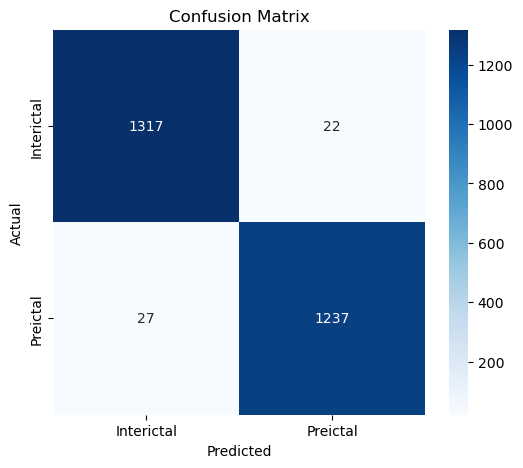

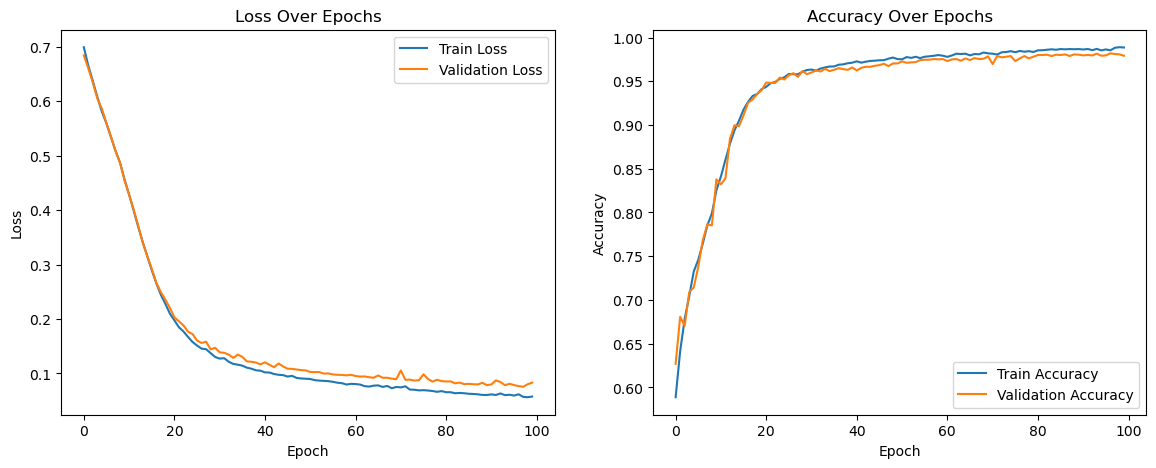

In [43]:
Y_pred_prob = model.predict(X_test).ravel()
Y_pred = (Y_pred_prob >= 0.5).astype(int)

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Interictal', 'Preictal']))

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Interictal', 'Preictal'],
            yticklabels=['Interictal', 'Preictal'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(14,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()
